In [27]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("finaldata.csv", index_col = False)
df = df.drop(["FractionalIncrease", "High", "Low", "Positive"],axis=1)
df = df.fillna(0)
x_train, x_test, y_train, y_test = train_test_split(df.drop(["Delta"], axis=1), df["Delta"], test_size=0.20, random_state=4)
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [3]:
# df['ReuterCredit'] = 1-df['ReuterCredit']
# df['InvestCredit'] = 1-df['InvestCredit']
# df['FoolCredit'] = 1-df['FoolCredit']
# df['CnbcCredit'] = 1-df['CnbcCredit']
# df['MarketCredit'] = 1-df['MarketCredit']
df

Open   Delta  ReuterCredit  reuter_score  InvestCredit  invest_score  \
0     778.550  -4.060      0.973861      0.378063      0.976303      0.911567   
1     792.950  14.400      0.949589      0.776000      0.931008      0.873125   
2     817.360  24.410      0.945488      0.468813      0.937707      0.959300   
3     809.100  -8.260      0.958241      0.093980      0.950460      0.982900   
4     802.330  -6.770      0.968660      0.634683      0.957466      0.952050   
5     807.500   5.170      0.971340      0.520433      0.961143      0.963560   
6     828.380  20.880      0.951983      0.970550      0.950226      0.875420   
7     829.000   0.620      0.958883      0.427571      0.957756      0.981425   
8     859.050  30.050      0.955338      0.360867      0.949628      0.968350   
9     815.000 -44.050      0.945884      0.240483      0.946424      0.988067   
10    831.730  16.730      0.955978      0.446863      0.956641      0.978900   
11    838.500   6.770      0.963086      0.688550      0.963630      0.921250   
12    851.080  12.580      0.940775      0.115389      0.948204      0.938600   
13    856.310   5.230      0.954243      0.881422      0.952601      0.604780   
14    853.690  -2.620      0.961990      0.430812      0.962504      0.976400   
15    870.530  16.840      0.960241      0.092762      0.959476      0.993720   
16    841.390 -29.140      0.947872      0.463950      0.951744      0.991800   
17    851.980  10.590      0.959188      0.956917      0.956075      0.741020   
18    849.500  -2.480      0.969343      0.535957      0.964785      0.761230   
19    841.040  -8.460      0.960976      0.090320      0.955182      0.802000   
20    859.740  18.700      0.959337     -0.138700      0.960451      0.929357   
21    890.000  30.260      0.954866      0.386140      0.956009      0.908040   
22    950.290  60.290      0.949166      0.360056      0.949371      0.954340   
23    951.290   1.000      0.962801      0.258529      0.963098      0.536350   
24    943.200  -8.090      0.950732      0.000000      0.963361      0.972050   
25    979.000  35.800      0.956565      0.000000      0.960496      0.981330   
26    990.960  11.960      0.958818     -0.108480      0.957176      0.977680   
27   1004.230  13.270      0.968058      0.483967      0.969697      0.952140   
28    948.020 -56.210      0.964556      0.000000      0.967995      0.000000   
29    976.870  28.850      0.949603      0.271027      0.955744      0.000000   
..        ...     ...           ...           ...           ...           ...   
270    51.614   0.900      0.959337      0.255711      0.960451      0.985750   
271    53.396   1.782      0.954866      0.386987      0.956009      0.973533   
272    54.490   1.094      0.949166      0.501822      0.949371      0.412600   
273    53.515  -0.975      0.962801      0.792914      0.963098      0.987650   
274    51.573  -1.942      0.950732      0.676843      0.963361      0.986500   
275    52.499   0.926      0.956565      0.783140      0.960496      0.991800   
276    50.803  -1.696      0.958818      0.323386      0.957176      0.989000   
277    51.267   0.464      0.968058      0.516667      0.969697      0.993200   
278    53.278   2.011      0.964556      0.360362      0.967995      0.983233   
279    52.055  -1.223      0.949603      0.000000      0.955744      0.000000   
280    54.866   2.811      0.958270      0.000000      0.963424      0.000000   
281    55.190   0.324      0.959790      0.000000      0.965351      0.000000   
282    54.480  -0.710      0.960305      0.000000      0.965747      0.000000   
283    54.185  -0.295      0.960868      0.000000      0.965699      0.000000   
284    54.086  -0.099      0.946547      0.000000      0.949770      0.000000   
285    53.129  -0.957      0.948479      0.386709      0.951724      0.977900   
286    52.027  -1.102      0.962293      0.696571      0.956636      0.990800   
287    52.106   0.079      0.961899     

In [8]:
df_no_cred = df[["Open", "Delta", "reuter_score", "invest_score", "fool_score", "cnbc_score", "market_score"]].copy()

In [19]:
df_no_cred
xnc_train, xnc_test, ync_train, ync_test = train_test_split(df_no_cred.drop(["Delta"], axis=1), df_no_cred["Delta"], test_size=0.20, random_state=4)
xnc_train = xnc_train.values
xnc_test = xnc_test.values
ync_train = ync_train.values
ync_test = ync_test.values

In [29]:
model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               6144      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 513       
Total params: 269,313
Trainable params: 269,313
Non-trainable params: 0
_________________________________________________________________


In [31]:
adam = Adam(lr=0.1)
model.compile(loss='mean_squared_error',
 optimizer='adam',
 metrics=['mse'])

In [32]:
history = model.fit(x_train, y_train,
 batch_size=128,
 epochs=10000,
 verbose=0,
 validation_split=0.1)

In [33]:
modelnc = Sequential()
modelnc.add(Dense(512, input_dim=xnc_train.shape[1], activation='relu'))
modelnc.add(Dropout(0.1))
modelnc.add(Dense(512, activation='relu'))
modelnc.add(Dropout(0.1))
modelnc.add(Dense(1, activation='linear'))


adam = Adam(lr=0.1)
modelnc.compile(loss='mean_squared_error',
 optimizer='adam',
 metrics=['mse'])

In [34]:
historync = modelnc.fit(xnc_train, ync_train,
 batch_size=128,
 epochs=10000,
 verbose=0,
 validation_split=0.1)

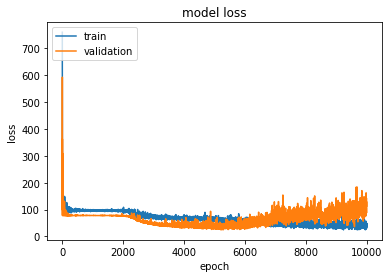

In [35]:
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
fig.savefig("deltaloss.png")

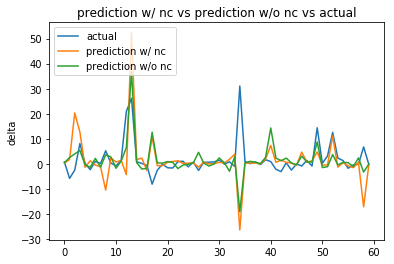

In [36]:
fig = plt.figure()
plt.plot(y_test)
plt.plot(model.predict(x_test))
plt.plot(modelnc.predict(xnc_test))
plt.title('prediction w/ nc vs prediction w/o nc vs actual')
plt.ylabel('delta')
plt.legend(['actual', 'prediction w/ nc', 'prediction w/o nc'], loc='upper left')
plt.show()

fig.savefig("deltaincrease.png")

In [37]:
score = model.evaluate(x_test, y_test, verbose=0)

In [38]:
score

[111.89983520507812, 111.89983520507812]

In [39]:
scorenc = modelnc.evaluate(xnc_test, ync_test, verbose=0)

In [40]:
scorenc

[67.0160909016927, 67.0160909016927]